In [1]:
!pip install basicsr facexlib
!pip install -q gfpgan
!pip install opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 k

In [2]:
# Clone the GFPGAN repo to access the models
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Download pretrained model (version 1.3)
!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P experiments/pretrained_models


Cloning into 'GFPGAN'...
remote: Enumerating objects: 527, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 527 (delta 170), reused 154 (delta 154), pack-reused 315 (from 2)
Receiving objects: 100% (527/527), 5.38 MiB | 21.17 MiB/s, done.
Resolving deltas: 100% (281/281), done.
/content/GFPGAN
--2025-04-12 11:24:52--  https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/349321229/e9847322-b8b1-4ec2-9620-5146eb8a9e4b?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20250412%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20250412T112452Z&X-Amz-Expires=300&X-Amz-Signature=b0b3a2b92a0e7d56ab92e6c14bd8ab769b69e8e78a3b5b132

In [8]:
!sed -i 's/from torchvision.transforms.functional_tensor import rgb_to_grayscale/from torchvision.transforms.functional import rgb_to_grayscale/' /usr/local/lib/python3.11/dist-packages/basicsr/data/degradations.py


In [9]:
import os
import cv2
import numpy as np
import torch
from gfpgan import GFPGANer
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

Saving 3_0_lowres.jpg to 3_0_lowres.jpg
Processing image...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /content/GFPGAN/gfpgan/weights/detection_Resnet50_Final.pth



100%|██████████| 104M/104M [00:00<00:00, 458MB/s]


Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_parsenet.pth" to /content/GFPGAN/gfpgan/weights/parsing_parsenet.pth



100%|██████████| 81.4M/81.4M [00:00<00:00, 584MB/s]


Enhanced image saved at: results/3_0_lowres_restored.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

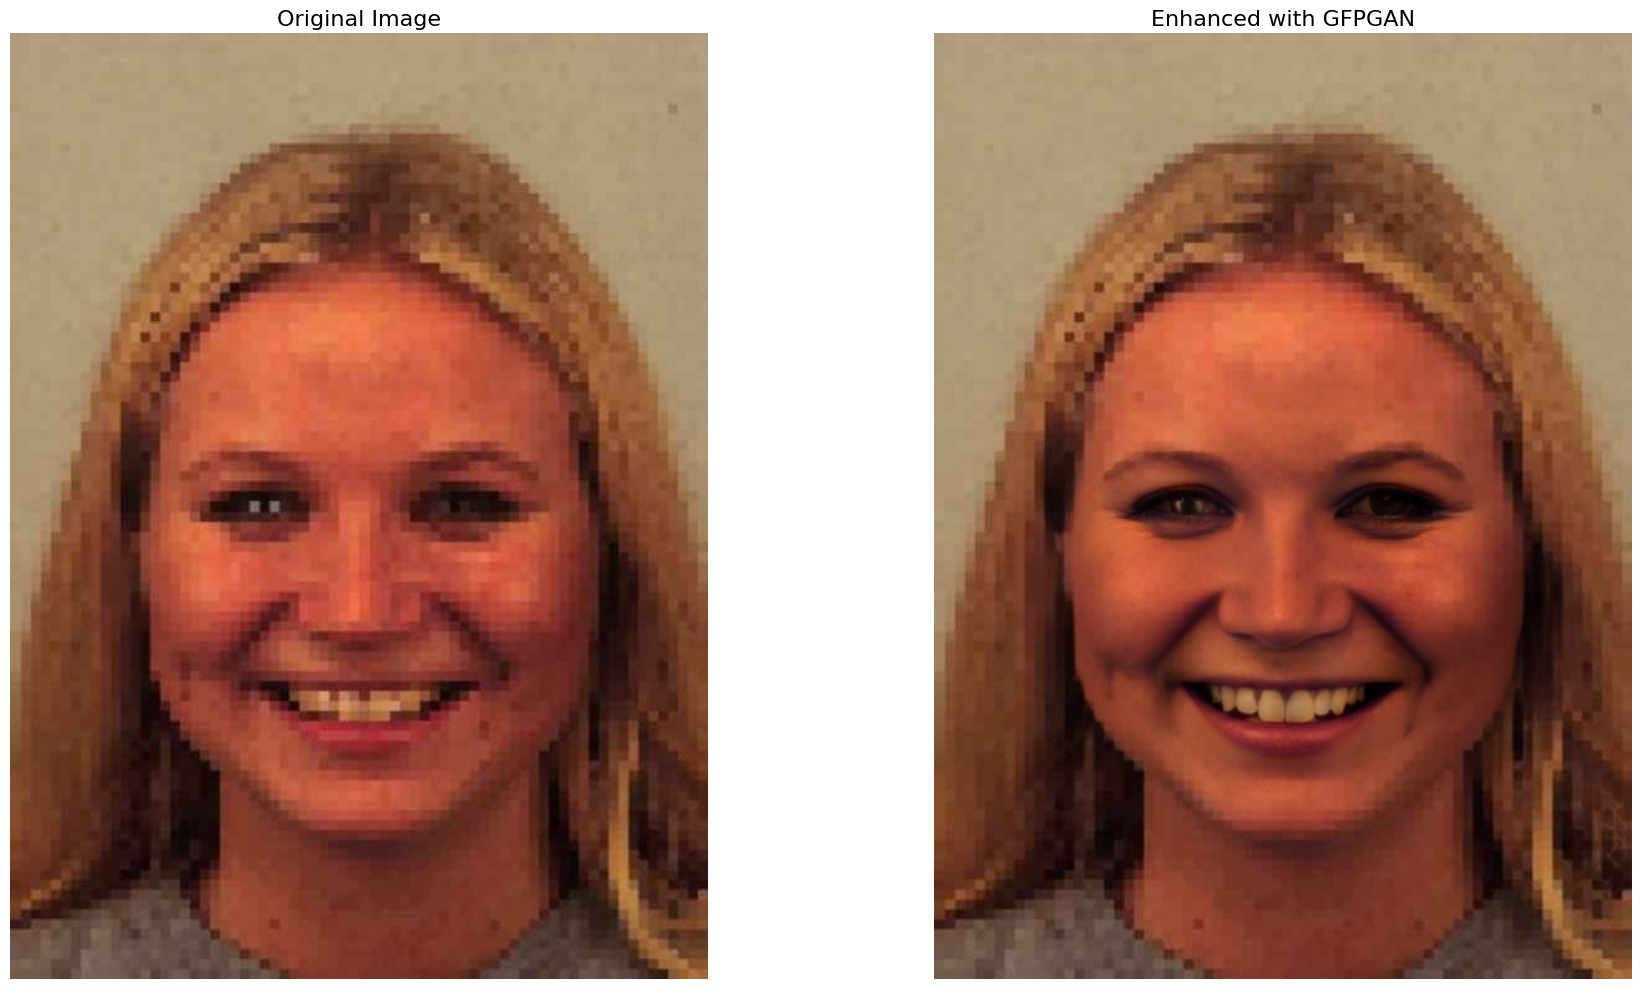


Summary:
- Original resolution: (762, 562, 3)
- Enhanced resolution: (1524, 1124, 3)


In [10]:
# Upload an image from local computer
uploaded = files.upload()
input_img_path = list(uploaded.keys())[0]

def enhance_face_with_gfpgan(input_img_path, output_dir='results'):
    """
    Enhance a face image using GFPGAN

    Args:
        input_img_path (str): path to the input image
        output_dir (str): output folder

    Returns:
        tuple: (original image, enhanced image)
    """
    os.makedirs(output_dir, exist_ok=True)

    model = GFPGANer(
        model_path='experiments/pretrained_models/GFPGANv1.3.pth',
        upscale=2,
        arch='clean',
        channel_multiplier=2,
        bg_upsampler=None
    )

    img = cv2.imread(input_img_path, cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError(f'Failed to read image: {input_img_path}')

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    _, _, restored_img = model.enhance(
        img_rgb,
        has_aligned=False,
        only_center_face=False,
        paste_back=True
    )

    base_name = os.path.basename(input_img_path).split('.')[0]
    output_path = os.path.join(output_dir, f"{base_name}_restored.png")

    cv2_restored = cv2.cvtColor(restored_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_path, cv2_restored)

    print(f'Enhanced image saved at: {output_path}')
    files.download(output_path)

    return img_rgb, restored_img

def display_comparison(original, restored):
    """
    Display original vs. enhanced image
    """
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    plt.title('Original Image', fontsize=16)
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Enhanced with GFPGAN', fontsize=16)
    plt.imshow(restored)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Run enhancement
print("Processing image...")
original, restored = enhance_face_with_gfpgan(input_img_path)

# Show results
display_comparison(original, restored)


print("\nSummary:")
print("- Original resolution:", original.shape)
print("- Enhanced resolution:", restored.shape)
